## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.

- became_member_on : 회원가입을 한 날짜

- income : 고객의 수입(연봉, 달러기준)



2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.

- event : 이벤트가 실행된 정도 (offer received ~ transaction)

- value : 해당 event에 대해 발생한 데이터

- time : 이벤트가 시작된 후 어느정도의 시간이 흘렀는지(시간 기준)



3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.


- reward : offer를 완료했을 때 지급된 보상

- channels : 이벤트에 사용한 채널

- difficulty : offer를 완료하는데 까지 소모된 리소스(상대적으로 점수화)

- duration : offer를 완료하는데 까지 소모된 시간

- offer_type : 이벤트에서 전달된 offer의 종류


### 1. 라이브러리 및 데이터 로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_path = "./data/starbucks_survey/"
transcript = pd.read_csv(base_path + "transcript.csv").drop("Unnamed: 0", axis=1)
profile = pd.read_csv(base_path + "profile.csv").drop("Unnamed: 0", axis=1)
portfolio = pd.read_csv(base_path + "portfolio.csv").drop("Unnamed: 0", axis=1)

In [4]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [5]:
profile

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [6]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [7]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [8]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [9]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [10]:
# profile만 결측치가 존재하므로, 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
nans = profile[profile.isnull().any(axis=1)]
nans

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [11]:
nans.age.value_counts()

118    2175
Name: age, dtype: int64

In [12]:
nans.id.value_counts()

68be06ca386d4c31939f3a4f0e3dd783    1
36ca38ce449645fcacc6fe0465010d64    1
105b50604fdc47298aa592d8946b8ac5    1
cd1f2f7d93614d5ea28f27c4875be0ff    1
42636c607b97409ca9d284a8d13405ba    1
                                   ..
2bf7e519dfca407c8287f756717345b9    1
0914283b4a2948d18d7978e28f10ef1f    1
3c67bf028e684c71b3b3dca7a55522fa    1
26982ffe1e974c71bed1036e5ce0c167    1
c02b10e8752c4d8e9b73f918558531f7    1
Name: id, Length: 2175, dtype: int64

In [13]:
# profile에 존재하는 결측치를 포함한 데이터들은 나이와 성별이 기재가 되어있지 않으며 모두 118세라는 이상한 특징이 있기 때문에 정상 데이터가 아니라고 판단, 삭제한다.
profile.dropna(inplace=True)
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 14825명의 데이터에 대한 분석을 수행합니다.

In [14]:
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [15]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


#### 성별에 관한 분석

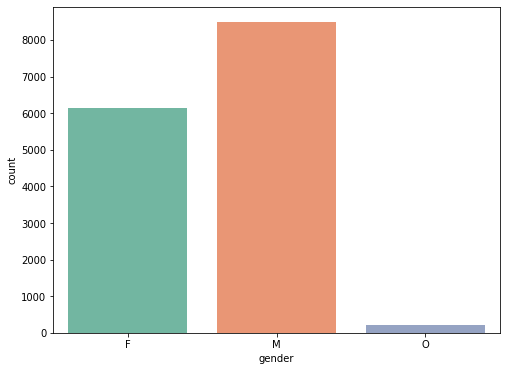

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=profile, x="gender", palette="Set2")
plt.show()

#### 나이에 대한 분석

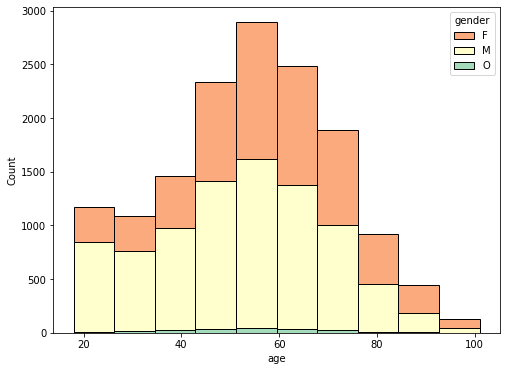

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=profile, x="age", hue="gender", bins=10, palette="Spectral", multiple="stack")
plt.show()

#### 회원이 된 날짜에 대한 분석

In [18]:
# 스타벅스 회원가입을 시작한 년/월별 count를 체크해봅니다.
profile["join_yr"] = profile.became_member_on.dt.year
profile["join_month"] = profile.became_member_on.dt.month
profile

,gender,age,id,became_member_on,income,join_yr,join_month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018,6
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018,7
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017,1
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016,3


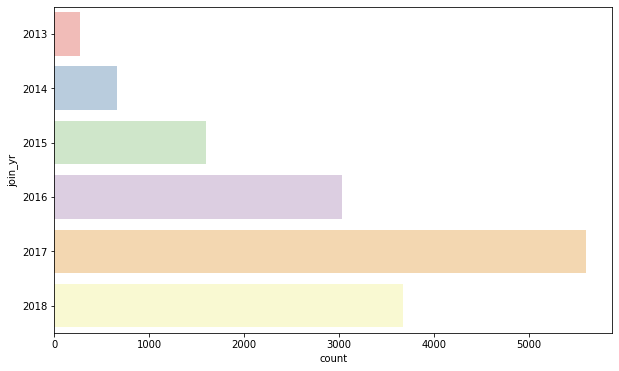

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=profile, y="join_yr", palette="Pastel1")
plt.show()

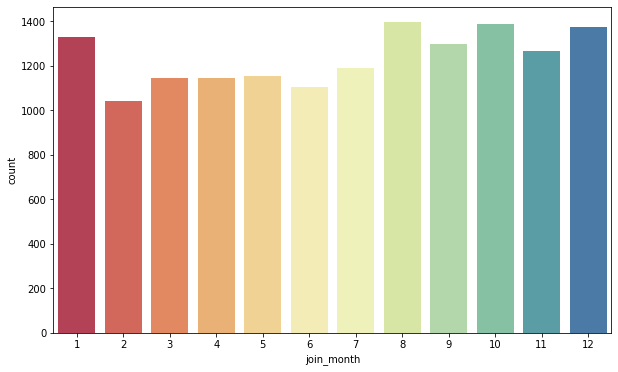

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=profile, x="join_month", palette="Spectral")
plt.show()

#### 수입에 대한 분석

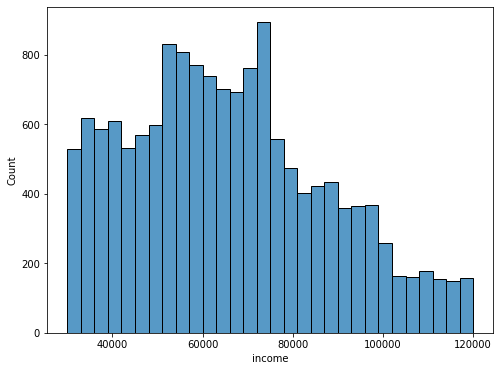

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=profile, x="income", bins=30, palette="Set2")
plt.show()

#### profile 데이터에 대한 상관관계 분석

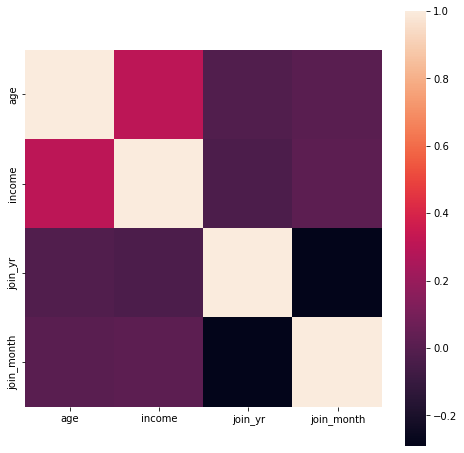

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(profile.corr(), square=True)
plt.show()

### 4. transcript에 대한 분석

In [23]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


#### person에 대한 분석

In [24]:
# 처음에 profile에 있었던 17000명에 대한 이벤트 참여 정보, 제일 많이 참여한 사람이 51번
transcript.person.value_counts()

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
79d9d4f86aca4bed9290350fb43817c2    48
                                    ..
afd41b230f924f9ca8f5ed6249616114     2
3a4e53046c544134bb1e7782248631d1     2
e63e42480aae4ede9f07cac49c8c3f78     2
7ecfc592171f4844bdc05bdbb48d3847     2
da7a7c0dcfcb41a8acc7864a53cf60fb     1
Name: person, Length: 17000, dtype: int64

#### event에 대한 분석

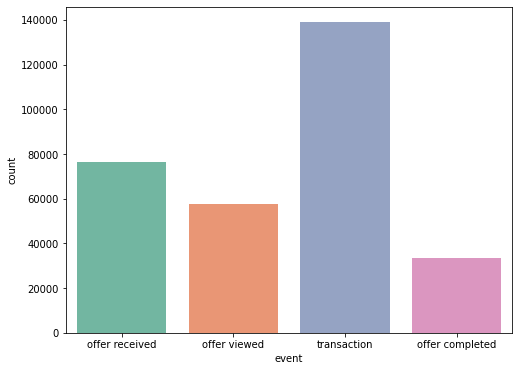

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="event", palette="Set2")
plt.show()

#### time에 대한 분석

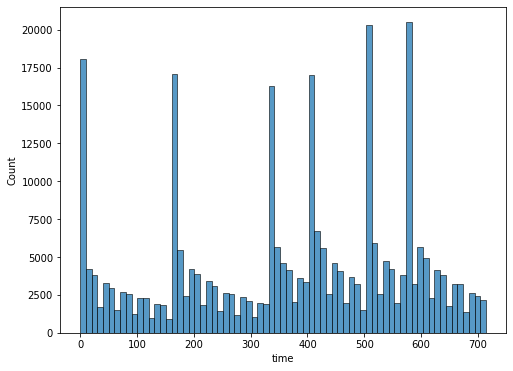

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data=transcript, x="time")
plt.show()

#### (Advanced, optional) value에 대한 분석 

In [27]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [28]:
list(transcript.value[0].keys())[0]

'offer id'

In [29]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

,person,event,value,time,value_key,value_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3.53


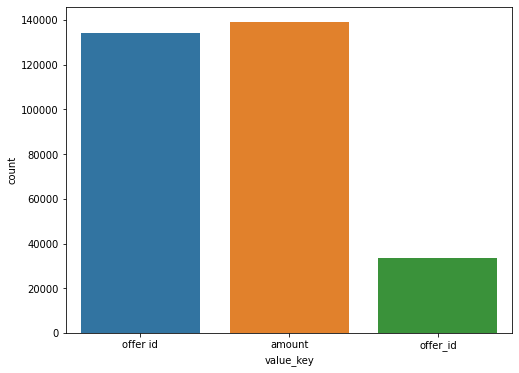

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key")
plt.show()

In [31]:
transcript.value_value.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
                                    ...  
635.06                                  1
42.51                                   1
124.03                                  1
40.49                                   1
476.33                                  1
Name: value_value, Length: 5113, dtype: int64

In [32]:
temp = transcript.loc[transcript.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

,id
0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2906b810c7d4411798c6938adc9daaa5
3,fafdcd668e3743c1bb461111dcafc2a4
4,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2
167577,fafdcd668e3743c1bb461111dcafc2a4
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7
167579,fafdcd668e3743c1bb461111dcafc2a4


In [33]:
temp.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
9b98b8c7a33c4b65b9aebfe6a799e6d9    16202
2906b810c7d4411798c6938adc9daaa5    15767
5a8bc65990b245e5a138643cd4eb9837    14305
0b1e1539f2cc45b7b9fa7c272da2e1d7    13751
3f207df678b143eea3cee63160fa8bed    11761
Name: value_value, dtype: int64

In [34]:
temp_portfolio = pd.merge(temp_df, portfolio, how="left", on="id")
temp_portfolio

,id,reward,channels,difficulty,duration,offer_type
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"['web', 'email', 'mobile']",5,7,bogo
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount
2,2906b810c7d4411798c6938adc9daaa5,2,"['web', 'email', 'mobile']",10,7,discount
3,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"['web', 'email', 'mobile', 'social']",7,7,discount
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount


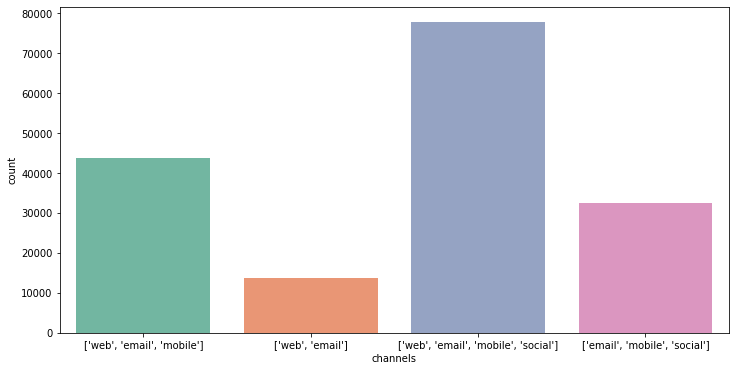

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_portfolio, x="channels", palette="Set2")
plt.show()